In [1]:
from LMNP import filtre_dict, InvestissementLocatif, MC
import matplotlib.pyplot as plt
import json

In [2]:
with open("config/sample.json", 'r') as file:
    config = json.load(file)
    params = filtre_dict(InvestissementLocatif, config)
    investissement = InvestissementLocatif(**params)
    params = filtre_dict(MC, config)
    investissement_avec_alea = MC(investissement=investissement, **params)

### Tableau récapitulatif

In [3]:
#investissement.df  # tableau récapitulatif sans couts aléatoires
i = 0 # chemin MC n°i, i = 0, ..., K-1
investissement_avec_alea.chemins[i].df # tableau récapitulatif avec couts aléatoires

,interet,capital,capital_restant,frais_garantis,frais_dossier,apport_pret,prime_assurance,frais_assurance_emprunt,loyer,frais_gestion,...,amortissement,reel_simplifie,micro_bic,impot,regime,frais_comptable,frais_notaire,frais_prorata,frais_signature,frais_agence_achat
2024-09-01,1011.766670,0.000000,199321.566663,3000.0,1500.0,0.0,15.0,50,0.0,600.0,...,4408.097222,0.00,0.0,0.0,reel_simplifie,0.0,15000.0,100.409836,10.0,0.0
2024-10-01,332.202611,679.564059,198642.002604,0.0,0.0,0.0,15.0,0,0.0,600.0,...,0.000000,0.00,0.0,0.0,reel_simplifie,0.0,0.0,0.000000,0.0,0.0
2024-11-01,331.070004,680.696666,197961.305939,0.0,0.0,0.0,15.0,0,1000.0,50.0,...,0.000000,0.00,0.0,0.0,reel_simplifie,400.0,0.0,0.000000,0.0,0.0
2024-12-01,329.935510,681.831160,197279.474778,0.0,0.0,0.0,15.0,0,1000.0,50.0,...,0.000000,0.00,472.0,0.0,reel_simplifie,0.0,0.0,0.000000,0.0,0.0
2025-01-01,328.799125,682.967545,196596.507233,0.0,0.0,0.0,15.0,0,1000.0,50.0,...,0.000000,0.00,0.0,0.0,reel_simplifie,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2065-08-01,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1000.0,50.0,...,0.000000,0.00,0.0,0.0,micro_bic,0.0,0.0,0.000000,0.0,0.0
2065-09-01,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1000.0,50.0,...,1290.000000,0.00,0.0,0.0,micro_bic,0.0,0.0,0.000000,0.0,0.0
2065-10-01,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1000.0,50.0,...,0.000000,0.00,0.0,0.0,micro_bic,0.0,0.0,0.000000,0.0,0.0
2065-11-01,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0,1000.0,50.0,...,0.000000,0.00,0.0,0.0,micro_bic,400.0,0.0,0.000000,0.0,0.0


### Cashflows annuels

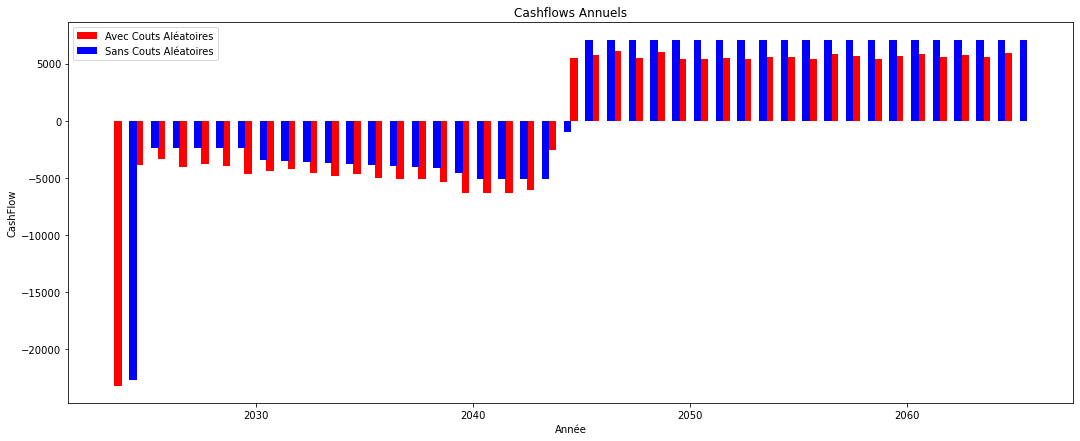

In [26]:
df = investissement_avec_alea.cashflow_annuel()
plt.figure(figsize=(18, 7))
width = 0.35
plt.bar(df.index - width, df.CF_avec_cout_aleatoire, width=width, color="red", label='Avec Couts Aléatoires')
plt.bar(df.index + width, df.CF_sans_cout_aleatoire, width=width, color="blue", label='Sans Couts Aléatoires')
plt.xlabel("Année")
plt.ylabel("CashFlow")
plt.title("Cashflows Annuels")
plt.legend()
plt.show()

### Rendements

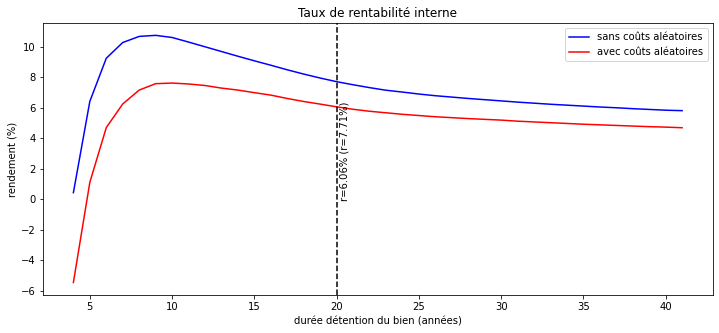

aport initial: {'notaire': 15129.535519125682, 'agence': 0.0, 'banque': 4550.0, 'bien': 0, 'total': 19679.535519125682}


valorisation bien (T=0): 200000
valorisation bien brute (T=20): 269426
valorisation bien net (T=20): 246767


pourcentage du bien payé (T=20): 48.19% (38.04% sans coûts aléatoires)
[<5%]: excellent | [5%,10%]: très bon | [10%,20%]: OK | [>20%]: faible


rendement brut: 5.26% (5.58% sans coûts aléatoires)
[<5%]: faible | [5%,7%]: OK | [7%,10%]: très bon | [>10%]: excellent


taux capitalisation (+frais): 4.05% (4.8% sans coûts aléatoires)
[<5%]: faible | [5%,7%]: OK | [7%,10%]: très bon | [>10%]: excellent


rendement_net (+financement): 2.92% (3.66% sans coûts aléatoires)
[<4%]: faible | [4%,6%]: OK | [6%,8%]: très bon | [>8%]: excellent


rendement_net_net (+impot): 2.29% (2.84% sans coûts aléatoires)
[<3%]: faible | [3%,5%]: OK | [5%,7%]: très bon | [>7%]: excellent
CPU times: user 1min 5s, sys: 191 ms, total: 1min 5s
Wall time: 1min 5s


In [5]:
%%time
inclus_frais_acquisition = True
investissement_avec_alea.afficher_metriques(inclus_frais_acquisition=inclus_frais_acquisition)